<a href="https://colab.research.google.com/github/muhammad-usama-aleem/classification_general_military_tank/blob/main/Assigned_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
!pip install unrar
!unrar x /content/gdrive/MyDrive/images.rar

In [3]:
!rm -rf /content/vehicles/images

In [4]:
import os

base_dir = '/content/combined/'
os.mkdir(base_dir)

In [5]:
!mv /content/vehicles /content/combined

In [6]:
!mv /content/general /content/combined

In [7]:
!mv /content/army /content/combined

In [8]:
import numpy as np
import tensorflow as tf

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('combined')

print (dataset_path)  #what kinds of classes are in this dataset

print("Types of classes labels found: ", len(dataset_path))

['army', 'vehicles', 'general']
Types of classes labels found:  3


In [9]:
class_labels = []

for item in dataset_path:
 # Get all the file names
 all_classes = os.listdir('combined' + '/' +item)
#  print(all_classes)

 # Add them to the list
 for room in all_classes:
    class_labels.append((item, str('dataset_path' + '/' +item) + '/' + room))
    # print(dataset_path, item, room)
print(class_labels)

[('army', 'dataset_path/army/21.png'), ('army', 'dataset_path/army/154.png'), ('army', 'dataset_path/army/298.png'), ('army', 'dataset_path/army/156.png'), ('army', 'dataset_path/army/195.png'), ('army', 'dataset_path/army/393.png'), ('army', 'dataset_path/army/photo-1576317193864-b65b3b7f08f3.jfif'), ('army', 'dataset_path/army/417.png'), ('army', 'dataset_path/army/images (1).jfif'), ('army', 'dataset_path/army/images (12).jfif'), ('army', 'dataset_path/army/130.png'), ('army', 'dataset_path/army/photo-1602640557390-88800eee460f.jfif'), ('army', 'dataset_path/army/422.png'), ('army', 'dataset_path/army/166.png'), ('army', 'dataset_path/army/176.png'), ('army', 'dataset_path/army/226.png'), ('army', 'dataset_path/army/images_q=tbn_ANd9GcQA_tCPW4wU8Tda6R7P4x6PmQNT2hqt4EpMiw&usqp=CAU.jpg'), ('army', 'dataset_path/army/images_q=tbn_ANd9GcQJSh4v3JNkcwuxLEHuv2zf_P6qTD_Jz5YUKw&usqp=CAU.jpg'), ('army', 'dataset_path/army/509.png'), ('army', 'dataset_path/army/476.png'), ('army', 'dataset_pat

In [10]:
# Build a dataframe        
df = pd.DataFrame(data=class_labels, columns=['Labels', 'image'])
print(df.head())
print(df.tail())

  Labels                      image
0   army   dataset_path/army/21.png
1   army  dataset_path/army/154.png
2   army  dataset_path/army/298.png
3   army  dataset_path/army/156.png
4   army  dataset_path/army/195.png
       Labels                                image
1510  general  dataset_path/general/image_1559.jpg
1511  general   dataset_path/general/image_249.jpg
1512  general   dataset_path/general/image_365.jpg
1513  general   dataset_path/general/image_330.jpg
1514  general   dataset_path/general/image_913.jpg


In [11]:
# Let's check how many samples for each category are present
print("Total number of images in the dataset: ", len(df))

label_count = df['Labels'].value_counts()
print(label_count)

Total number of images in the dataset:  1515
general     513
army        502
vehicles    500
Name: Labels, dtype: int64


In [12]:
import cv2
path = 'combined/'
dataset_path = os.listdir('combined')

im_size = 224

images = []
labels = []

for i in dataset_path:
    data_path = path + str(i)
    filenames = [i for i in os.listdir(data_path) ]
    print(data_path)
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))
        # try:
          #  img = cv2.resize(img, (im_size, im_size), interpolation=cv2.INTER_AREA)
          #  print(img.shape)
        # except:
        #   print(img, f,'------------------------------------------------------------------------------------------')
        images.append(img)
        labels.append(i)

combined/army
combined/vehicles
combined/general


In [13]:
images = np.array(images)
print(images.shape)
images = images.astype('float32') / 255.0
# images = preprocess_input(images)
print(images.shape)

(1515, 224, 224, 3)
(1515, 224, 224, 3)


In [14]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=df['Labels'].values
print(y)
print(len(y))
print(list(set(y)))
y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print(y)
print(list(set(y)))

['army' 'army' 'army' ... 'general' 'general' 'general']
1515
['vehicles', 'army', 'general']
[0 0 0 ... 1 1 1]
[0, 1, 2]


In [15]:
y=y.reshape(-1,1)

from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y = ct.fit_transform(y) #.toarray()
print(Y[:5])
print(Y[35:])

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [16]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, Y, random_state=1)


train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.2, random_state=0)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(1212, 224, 224, 3)
(1212, 3)
(303, 224, 224, 3)
(303, 3)


In [17]:
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0

NUM_CLASSES = 3
IMG_SIZE = 224
size = (IMG_SIZE, IMG_SIZE)


inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))


# Using model without transfer learning

outputs = EfficientNetB0(include_top=True, weights=None, classes=NUM_CLASSES)(inputs)

In [18]:
model = tf.keras.Model(inputs, outputs)

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"] )
# change optimizer and loss function

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, 3)                 4053414   
Total params: 4,053,414
Trainable params: 4,011,391
Non-trainable params: 42,023
_________________________________________________________________


In [19]:
hist = model.fit(train_x, train_y, epochs=30, verbose=2)

Epoch 1/30
38/38 - 172s - loss: 3.2668 - accuracy: 0.3713
Epoch 2/30
38/38 - 164s - loss: 1.9881 - accuracy: 0.4810
Epoch 3/30
38/38 - 161s - loss: 1.4874 - accuracy: 0.5545
Epoch 4/30
38/38 - 161s - loss: 1.1639 - accuracy: 0.6262
Epoch 5/30
38/38 - 160s - loss: 0.8012 - accuracy: 0.7219
Epoch 6/30
38/38 - 161s - loss: 0.7512 - accuracy: 0.7409
Epoch 7/30
38/38 - 161s - loss: 0.7669 - accuracy: 0.7797
Epoch 8/30
38/38 - 161s - loss: 0.6948 - accuracy: 0.7871
Epoch 9/30
38/38 - 162s - loss: 0.6066 - accuracy: 0.7871
Epoch 10/30
38/38 - 162s - loss: 0.4561 - accuracy: 0.8680
Epoch 11/30
38/38 - 161s - loss: 0.3972 - accuracy: 0.8878
Epoch 12/30
38/38 - 161s - loss: 0.2148 - accuracy: 0.9158
Epoch 13/30
38/38 - 162s - loss: 0.2337 - accuracy: 0.9373
Epoch 14/30
38/38 - 164s - loss: 0.3506 - accuracy: 0.9109
Epoch 15/30
38/38 - 167s - loss: 0.1332 - accuracy: 0.9587
Epoch 16/30
38/38 - 165s - loss: 0.0926 - accuracy: 0.9670
Epoch 17/30
38/38 - 161s - loss: 0.1265 - accuracy: 0.9695
Epoch 

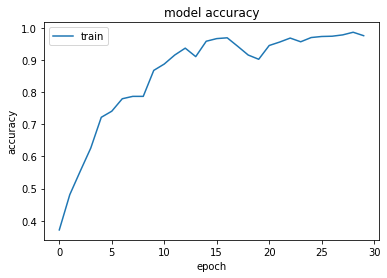

In [20]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    #plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


plot_hist(hist)

In [21]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

10/10 [==============================] - 9s 746ms/step - loss: 0.8557 - accuracy: 0.7822
Loss = 0.8556923270225525
Test Accuracy = 0.7821782231330872


In [22]:
pred = model.predict(test_x)

from sklearn.metrics import confusion_matrix
pred = np.argmax(pred, axis=1)
test_y = np.argmax(test_y, axis=1)
confusion = confusion_matrix(test_y, pred)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[75 10 11]
 [26 75 12]
 [ 7  0 87]]


[0. 1. 0.]
[0, 1, 0]
army


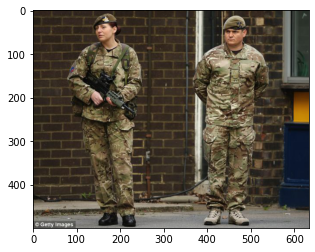

In [25]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input


img_path = '/content/army_test.jpg'


img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))
img_array = image.img_to_array(img)

img_batch = np.expand_dims(img_array, axis=0)

img_preprocessed = preprocess_input(img_batch)

my_image = imread(img_path)
imshow(my_image)

preds=model.predict(img_preprocessed)

joined = preds[0]
# print(joined)
# joined = np.argmax(joined, axis=0)
joined[np.where(joined==np.max(joined)) ] = 1
joined[np.where(joined!=np.max(joined)) ] = 0
joined = list(map(int,joined))
print(joined)
label = ['vehicle', 'army', 'general']
zipped = zip(joined, label)
for i in list(zipped):
  if i[0] == 1:
    print(i[1])


[0, 1, 0]
army


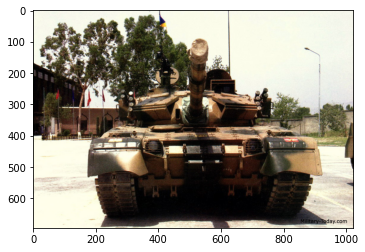

In [28]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input


img_path = '/content/combined/vehicles/al_khalid_l1.jpg'


img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))
img_array = image.img_to_array(img)

img_batch = np.expand_dims(img_array, axis=0)

img_preprocessed = preprocess_input(img_batch)

my_image = imread(img_path)
imshow(my_image)

preds=model.predict(img_preprocessed)

joined = preds[0]
# print(joined)
# joined = np.argmax(joined, axis=0)
joined[np.where(joined==np.max(joined)) ] = 1
joined[np.where(joined!=np.max(joined)) ] = 0
joined = list(map(int,joined))
print(joined)
label = ['vehicle', 'army', 'general']
zipped = zip(joined, label)
for i in list(zipped):
  if i[0] == 1:
    print(i[1])


[0, 1, 0]
army


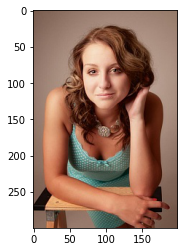

In [32]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import decode_predictions
from tensorflow.keras.applications.resnet50 import preprocess_input


img_path = '/content/combined/general/image_100.jpg'

img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))
img_array = image.img_to_array(img)

img_batch = np.expand_dims(img_array, axis=0)

img_preprocessed = preprocess_input(img_batch)

my_image = imread(img_path)
imshow(my_image)

preds=model.predict(img_preprocessed)

joined = preds[0]
# print(joined)
# joined = np.argmax(joined, axis=0)
joined[np.where(joined==np.max(joined)) ] = 1
joined[np.where(joined!=np.max(joined)) ] = 0
joined = list(map(int,joined))
print(joined)
label = ['vehicle', 'army', 'general']
zipped = zip(joined, label)
for i in list(zipped):
  if i[0] == 1:
    print(i[1])